In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
text_data=datasets.fetch_20newsgroups()

In [3]:
print("Keys : \n{}".format(text_data.keys()))
text_data['target_names']


Keys : 
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
train=datasets.fetch_20newsgroups(subset="train",categories=text_data['target_names'])
test=datasets.fetch_20newsgroups(subset="test",categories=text_data['target_names'])
x_train=train["data"]
x_test=test["data"]
y_train=train["target"]
y_test=test['target']

In [5]:
df=pd.DataFrame(x_train,columns=["mess"])
df["target"]=y_train


In [6]:
df.head(10)

,mess,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16
6,From: bmdelane@quads.uchicago.edu (brian manni...,13
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4


In [7]:
Y_train=df['target']
Y_train=np.array(Y_train)
# print(y_t[0])

In [8]:
X_train=df.drop("target",axis=1)
X_train=np.array(X_train)
# print(x[2][0])

In [9]:
#test modification
df=pd.DataFrame(x_test,columns=["mess"])
df["target"]=y_test


In [10]:
df.head()

,mess,target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [11]:
Y_test=df["target"]
Y_test=np.array(Y_test)

In [12]:
import re,string

In [13]:

X_test=df.drop("target",axis=1)
X_test=np.array(X_test)
# print(X_test[1][0]
stripped=(X_test[0][0]).lower().split()#breaking into words
stripped

['from:',
 'v064mb9k@ubvmsd.cc.buffalo.edu',
 '(neil',
 'b.',
 'gandler)',
 'subject:',
 'need',
 'info',
 'on',
 '88-89',
 'bonneville',
 'organization:',
 'university',
 'at',
 'buffalo',
 'lines:',
 '10',
 'news-software:',
 'vax/vms',
 'vnews',
 '1.41',
 'nntp-posting-host:',
 'ubvmsd.cc.buffalo.edu',
 'i',
 'am',
 'a',
 'little',
 'confused',
 'on',
 'all',
 'of',
 'the',
 'models',
 'of',
 'the',
 '88-89',
 'bonnevilles.',
 'i',
 'have',
 'heard',
 'of',
 'the',
 'le',
 'se',
 'lse',
 'sse',
 'ssei.',
 'could',
 'someone',
 'tell',
 'me',
 'the',
 'differences',
 'are',
 'far',
 'as',
 'features',
 'or',
 'performance.',
 'i',
 'am',
 'also',
 'curious',
 'to',
 'know',
 'what',
 'the',
 'book',
 'value',
 'is',
 'for',
 'prefereably',
 'the',
 '89',
 'model.',
 'and',
 'how',
 'much',
 'less',
 'than',
 'book',
 'value',
 'can',
 'you',
 'usually',
 'get',
 'them',
 'for.',
 'in',
 'other',
 'words',
 'how',
 'much',
 'are',
 'they',
 'in',
 'demand',
 'this',
 'time',
 'of',
 '

In [14]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [15]:
dict={}
print(len(X_train))
for i in range(len(X_train)):
    word=X_train[i][0].lower()
    stripped=word.split()
    for s in stripped:
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dict:
            dict[s]+=1
        else:
            dict[s]=1
dict


11314


{'car': 880,
 'university': 4597,
 'college': 454,
 'park': 139,
 'wondering': 243,
 'anyone': 2252,
 'enlighten': 26,
 'saw': 489,
 'sports': 134,
 'looked': 328,
 'late': 221,
 'early': 422,
 'called': 995,
 'doors': 47,
 'really': 1972,
 'front': 387,
 'bumper': 23,
 'separate': 199,
 'rest': 406,
 'can': 9199,
 'tellme': 2,
 'model': 340,
 'engine': 257,
 'years': 1246,
 'whatever': 340,
 'info': 594,
 'funky': 6,
 'looking': 964,
 'please': 1780,
 'brought': 291,
 'neighborhood': 32,
 'lerxst': 2,
 'clock': 184,
 'poll': 31,
 'final': 327,
 'call': 959,
 'reports': 223,
 'washington': 312,
 'fair': 172,
 'number': 1448,
 'brave': 25,
 'souls': 26,
 'upgraded': 39,
 'oscillator': 20,
 'shared': 127,
 'experiences': 76,
 'send': 964,
 'brief': 64,
 'message': 825,
 'detailing': 22,
 'top': 482,
 'speed': 504,
 'cpu': 173,
 'rated': 48,
 'add': 396,
 'cards': 249,
 'heat': 112,
 'hour': 84,
 'usage': 69,
 'per': 521,
 'floppy': 237,
 'disk': 652,
 'functionality': 38,
 'floppies': 28

In [16]:
import operator
sorted_dic=sorted(dict.items(),key=operator.itemgetter(1),reverse=True)
sorted_dic

[('not', 16670),
 ('can', 9199),
 ('will', 8882),
 ('one', 7481),
 ('article', 6466),
 ('like', 5345),
 ('just', 5299),
 ('people', 4859),
 ('get', 4785),
 ('university', 4597),
 ('know', 4295),
 ('think', 4075),
 ('use', 3784),
 ('new', 3649),
 ('also', 3491),
 ('good', 3141),
 ('may', 3118),
 ('even', 3091),
 ('many', 2792),
 ('make', 2763),
 ('two', 2655),
 ('see', 2565),
 ('much', 2538),
 ('time', 2518),
 ('first', 2444),
 ('want', 2327),
 ('need', 2296),
 ('anyone', 2252),
 ('way', 2153),
 ('used', 2149),
 ('say', 2061),
 ('world', 1975),
 ('really', 1972),
 ('going', 1930),
 ('since', 1918),
 ('something', 1905),
 ('right', 1902),
 ('now', 1900),
 ('still', 1866),
 ('system', 1823),
 ('find', 1820),
 ('computer', 1817),
 ('believe', 1804),
 ('using', 1804),
 ('take', 1799),
 ('please', 1780),
 ('must', 1730),
 ('said', 1702),
 ('might', 1693),
 ('last', 1680),
 ('never', 1627),
 ('back', 1618),
 ('work', 1606),
 ('god', 1587),
 ('got', 1585),
 ('state', 1581),
 ('without', 1565),

In [17]:
import matplotlib.pyplot as plt


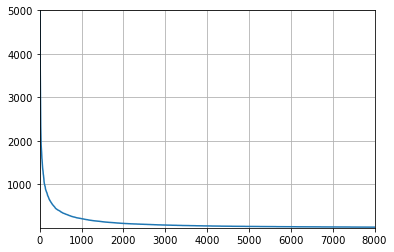

In [18]:
features=sorted_dic
ans1=[]
ans2=[]
for i in range(len(features)):
    ans1.append(i)
    ans2.append(features[i][1])
plt.plot(ans1,ans2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [19]:
#take 2500 word as our features
ans1=[features[i][0] for i in range(2500)]
ans1

['not',
 'can',
 'will',
 'one',
 'article',
 'like',
 'just',
 'people',
 'get',
 'university',
 'know',
 'think',
 'use',
 'new',
 'also',
 'good',
 'may',
 'even',
 'many',
 'make',
 'two',
 'see',
 'much',
 'time',
 'first',
 'want',
 'need',
 'anyone',
 'way',
 'used',
 'say',
 'world',
 'really',
 'going',
 'since',
 'something',
 'right',
 'now',
 'still',
 'system',
 'find',
 'computer',
 'believe',
 'using',
 'take',
 'please',
 'must',
 'said',
 'might',
 'last',
 'never',
 'back',
 'work',
 'god',
 'got',
 'state',
 'without',
 'off',
 'problem',
 'another',
 'well',
 'information',
 'number',
 'usa',
 'someone',
 'better',
 'sure',
 'made',
 'read',
 'government',
 'things',
 'space',
 'little',
 'help',
 'come',
 'give',
 'part',
 'file',
 'look',
 'every',
 'data',
 'point',
 'probably',
 'years',
 'available',
 'seems',
 'question',
 'program',
 'put',
 'windows',
 'tell',
 'long',
 'around',
 'set',
 'public',
 'least',
 'power',
 'different',
 'best',
 'drive',
 'try',

In [20]:
#making x_train dataset
X_train_dataset=np.zeros([len(X_train),len(ans1)],int)
for i in range(len(X_train)):
    words=X_train[i][0].lower()
    word=words.split()
    for j in word:
        if j in ans1:
            X_train_dataset[i][ans1.index(j)]+=1

In [21]:
print(X_train_dataset)

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [2 0 1 ... 0 0 0]
 [2 2 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
#making x_test dataset
X_test_dataset=np.zeros([len(X_test),len(ans1)],int)
for i in range(len(X_test)):
    words=X_test[i][0].lower()
    word=words.split()
    for j in word:
        if j in ans1:
            X_test_dataset[i][ans1.index(j)]+=1

In [23]:
print(X_test_dataset)

[[0 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
clf=MultinomialNB()
clf.fit(X_train_dataset,Y_train)
y_pred=clf.predict(X_test_dataset)
print("Testing score:",clf.score(X_test_dataset,Y_test))
print("Training score:",clf.score(X_train_dataset,Y_train))
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred))


Testing score: 0.6945034519383961
Training score: 0.8534558953508927
Confusion Matrix: [[192   4   1   1   1   0   2   2  13   0   0   1   0   7   2  44  12   7
    7  23]
 [  5 251  36   8  18  17   8   3   7   1   2   5  10   6   8   2   0   0
    1   1]
 [  0  30 261  28  21  16   8   4   4   0   2   1   4   6   3   1   0   0
    2   3]
 [  0  10  46 222  54   4  17   7   2   1   0   2  25   1   1   0   0   0
    0   0]
 [  1   9  28  32 260   1  17   8   2   2   0   1  19   3   2   0   0   0
    0   0]
 [  2  70  54   1   7 216  17   4   1   4   1   6   5   1   3   0   0   0
    3   0]
 [  0   6   2  32  11   0 299  11  10   3   1   0   8   2   2   0   0   0
    3   0]
 [  3   1   4   1   2   1  10 312  22   5   0   0  15   5   6   0   3   0
    3   3]
 [  0   1   2   1   2   1   5  29 333   5   0   0   5   2   0   2   7   0
    2   1]
 [  3   1   4   0   1   0  14   6   3 336  15   1   3   1   3   1   1   1
    2   1]
 [  0   1   1   0   1   0   1   3   2  38 337   0   2   1   0  

In [27]:
print("classification report:",classification_report(Y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.56      0.60      0.58       319
           1       0.55      0.65      0.59       389
           2       0.55      0.66      0.60       394
           3       0.63      0.57      0.60       392
           4       0.62      0.68      0.65       385
           5       0.80      0.55      0.65       395
           6       0.70      0.77      0.73       390
           7       0.73      0.79      0.76       396
           8       0.71      0.84      0.77       398
           9       0.82      0.85      0.83       397
          10       0.93      0.84      0.88       399
          11       0.87      0.80      0.83       396
          12       0.59      0.52      0.55       393
          13       0.79      0.69      0.74       396
          14       0.84      0.75      0.79       394
          15       0.67      0.74      0.70       398
          16       0.63      0.82      0.71       364
    

SELF IMPLEMENTATION OF MULTINOMIAL NAIVE BAYE'S

In [29]:
def fit(X_train_dataset,Y_train):
    count={}
    total_word=0
    count["total_doc"]=len(Y_train)
    classes=set(Y_train)
    for i in classes:
        temp=0
        x_train_with_i=X_train_dataset[Y_train==i]
        temp2=x_train_with_i.shape[0]
        count[i]={}
        for feature in ans1:
            l=(x_train_with_i[:,ans1.index(feature)]).sum()
            count[i][feature]=l
        count[i]["word_in_class"]=temp
        count[i]["length"]=temp2
    return count
    

In [30]:
def probability(X_test_dataset,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    for j in range(len(feature)-2):
        xj=X_test_dataset[j]
        if xj==0:
            current_prob=0
        else:
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
                                               

In [33]:
def predict_for_single(X_test_dataset,dic):
    first=True
    best_prob=-1
    best_class=-1
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(X_test_dataset,dic,i)
        if first or prob>best_prob:
            best_prob=prob
            best_class=i
            first=False
    return best_class

In [34]:
def predict_(X_test_dataset,dic):
    Y_pred=[]
    for x in X_test_dataset:
        Y_pred.append(predict_for_single(x,dic))
    return Y_pred

In [35]:
def score(Y_test,Y_pred):
    count=0
    for i in range(len(Y_pred)):
        if Y_pred[i]==Y_test[i]:
            count+=1
    return count/len(Y_pred)

In [37]:
dictionary=fit(X_train_dataset,Y_train)
Y_pred=predict_(X_test_dataset,dictionary)

In [38]:
dictionary

{'total_doc': 11314,
 0: {'not': 1418,
  'can': 543,
  'will': 380,
  'one': 551,
  'article': 399,
  'like': 259,
  'just': 290,
  'people': 483,
  'get': 136,
  'university': 156,
  'know': 211,
  'think': 360,
  'use': 81,
  'new': 81,
  'also': 145,
  'good': 141,
  'may': 145,
  'even': 225,
  'many': 244,
  'make': 172,
  'two': 88,
  'see': 180,
  'much': 135,
  'time': 144,
  'first': 102,
  'want': 91,
  'need': 77,
  'anyone': 80,
  'way': 149,
  'used': 83,
  'say': 268,
  'world': 113,
  'really': 113,
  'going': 74,
  'since': 119,
  'something': 170,
  'right': 84,
  'now': 68,
  'still': 94,
  'system': 121,
  'find': 89,
  'computer': 38,
  'believe': 222,
  'using': 45,
  'take': 123,
  'please': 65,
  'must': 204,
  'said': 159,
  'might': 115,
  'last': 32,
  'never': 85,
  'back': 53,
  'work': 38,
  'god': 387,
  'got': 46,
  'state': 59,
  'without': 100,
  'off': 64,
  'problem': 53,
  'another': 90,
  'well': 82,
  'information': 23,
  'number': 42,
  'usa': 12,

In [39]:
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 48   1   0   0   0   0   0   0   1   0   1  14   0   0   1 154   4  86
    9   0]
 [  2  99   1   4   0  98   0   0   0   0   2 135   1   1   9   9   0  24
    4   0]
 [  0  18  31  33   3 123   0   0   0   0   1 145   2   5   3   7   0  15
    8   0]
 [  0   6   2 181   3  24   2   2   0   0   1 120   3   3   6   5   1  32
    1   0]
 [  0   8   1  41 100  21   3   0   0   0   0 127   6   8   7   5   3  54
    1   0]
 [  0  15   1   2   0 269   0   1   0   1   1  77   0   1   7   4   0  15
    1   0]
 [  0   6   2  44  14   8 116  13   0   0   6  76   3   2  22   5  10  45
   18   0]
 [  0   1   0   1   0   3   3 112   1   0   2  45   0   4  15  14  25 140
   30   0]
 [  0   0   0   0   0   2   0  14 108   0   0  56   0   1   3  16  34 148
   16   0]
 [  0   0   0   0   0   4   1   0   0 105  70  46   1   4   4  22   9 104
   27   0]
 [  0   0   0   0   0   0   0   1   0   0 345   9   0   1   0   5   1  30
    7   0]
 [  1   1   0   0   0   1   0   0   0   0   0 365   0   0   1   1

In [40]:
print(score(Y_test,Y_pred))

0.4445034519383962
